In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :'03/31/2004']).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360) # hl means language, tz is time zone.

# Set up the keywords and the timeframe
keywords = ["UCLA", "Mac", "New phone", "iphone", "Interest rate", "Apple share price", "Chatgpt", "Taylor swift", "The earth flat"]
# Add your keywords here
start_date = '2004-03-31'
end_date = '2023-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X = df.resample("Q").mean()
# W : weekly frequency
# M : month end frequency
# SM : semi-month end frequency (15th and end of month)
# Q : quarter end frequency

In [10]:
temp = pd.concat([y, X], axis=1).dropna() # combine y and x on columns
y = temp[["BasicEPS"]].copy()
x = temp.iloc[:, 1:].copy()

# 2.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(x)

# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso = Lasso(alpha = .5)

In [15]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [16]:
coefficients = lasso.coef_

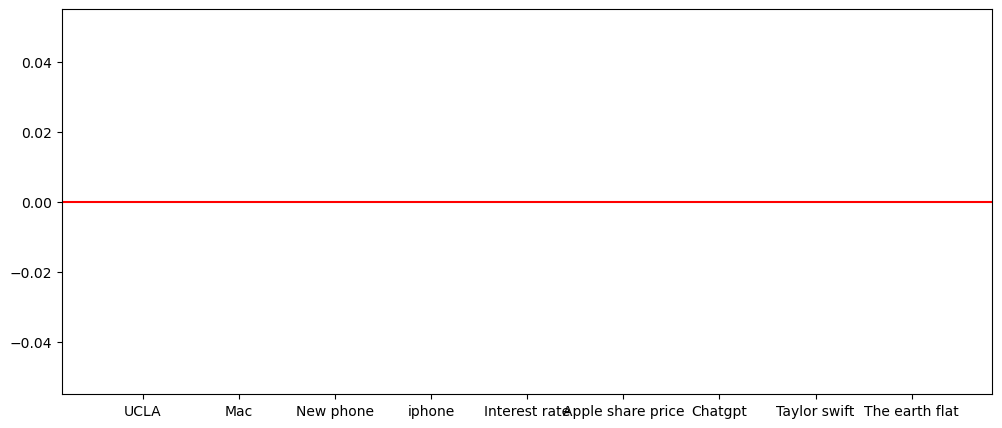

In [17]:
plt.figure(figsize = (12, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.axhline(0, color = "red")
plt.show()

But this graph has no significant variables, so the alpha is too big for the relationship, we should consider smaller alpha.

In [18]:
lasso = Lasso(alpha = .05)

In [19]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.05)

In [20]:
coefficients = lasso.coef_

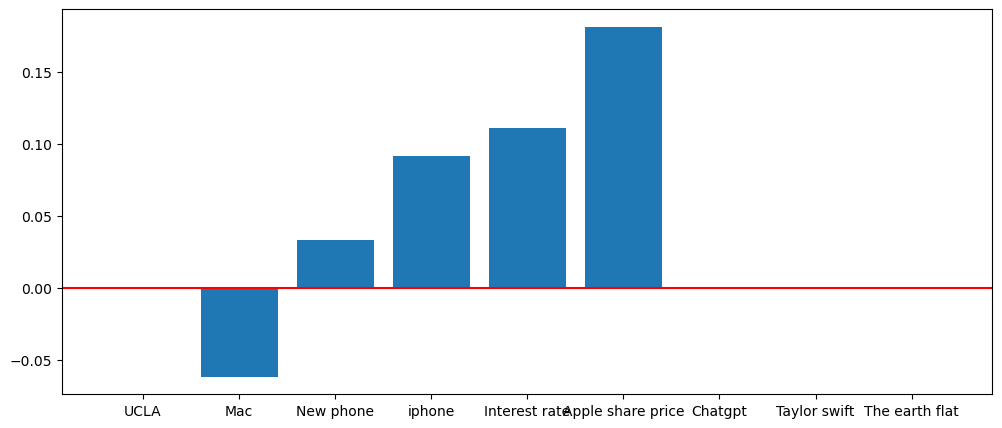

In [21]:
plt.figure(figsize = (12, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

They make sense since they are searching data, which is not so strongly revelant to the EPS growth. And from the aspect of their meaning, Mac is a famous name both for apple product and cosmetic, which partly explain its weird relationship with EPS. All the other variables are as positive as we would suggest considering the intuition in real life.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?